# Exploring AirBnb Data

This project involves an exploration of the AirBnB data from Seattle and Boston metro areas.

### To run this notebook

First, go to the pages for each data package [(here for Seattle)](https://www.kaggle.com/airbnb/seattle/data#)
and [(here for Boston)](https://www.kaggle.com/airbnb/seattle/data#), and click the "Download" link (the one
next to the "New Notebook" link at the top of the page.  This will download a zip file.

Place the Boston zip file in `data/boston/` within the same directory as this notebook, and the Seattle
zip file in `data/seattle` within the same directory as this notebook.  Unzip each file.  In the end,
each of the `data/seattle` and `data/boston` directories should have three `.csv` files: `listings.csv`, `calendar.csv`,
and `reviews.csv`

## Business Understanding

The goal of this project is to gain some insight into some stuff about AirBnB housing prices.  To that end,
there are three questions we will explore here

1. What are the most important aspects of insuring a high review score?
2. What are the most important predictors of a more expensive listing?
3. What are the most expensive times of the year to rent on AirBnb?  Does this differ based on whether the
listing is in Seattle or Boston?

## Data Understanding

This data consists of AirBnB housing data from Seattle and Boston, as obtained from Kaggle [(here for Seattle)](https://www.kaggle.com/airbnb/seattle/data#)
and [(here for Boston)](https://www.kaggle.com/airbnb/seattle/data#).

### Data Description

Each city's file package consists of three files: `listings.csv`, `calendar.csv`, and `reviews.csv`.

`listings.csv` consists of data intrinsic to each property listed on AirBnb -- features like how many beds or baths it
has, etc.

`calendar.csv` contains data on a per-listing, per-date basis, regarding whether it was available on such a date and,
if so, how much it cost.

`reviews.csv` consists of reviews of listings.  There is one row per review, and each row contains information on
the reviewer, what the review said, and what listing the review was about.  Importantly, there is no explicit
information given about whether the review rated the listing as "good" or bad -- that is, there is no "star rating" or
other common ranking value given.  However, note that aggregrated scores of this value are available in `listings.csv`


We will now dive more deeply into each file.

### `listings.csv`

Let's start by loading in the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

boston_listings_data = pd.read_csv("data/boston/listings.csv")
seattle_listings_data = pd.read_csv("data/seattle/listings.csv")
listings_data = pd.concat((boston_listings_data, seattle_listings_data), axis=0)

The data looks like

In [2]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Here are the columns

In [3]:
print(listings_data.columns)
print(listings_data.dtypes)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

Description:

In [4]:
listings_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,7.403000e+03,7.403000e+03,7.403000e+03,7401.000000,7401.000000,7403.000000,7403.000000,7403.000000,7373.000000,7387.000000,...,5943.000000,5922.000000,5932.000000,5925.000000,5934.000000,5926.000000,5926.000000,0.0,7403.000000,6020.000000
mean,6.950001e+06,2.016049e+13,2.021053e+07,32.222537,32.222537,45.067727,-97.515448,3.200189,1.241150,1.282659,...,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777,NaN,7.686073,2.028161
std,4.052397e+06,4.009296e+08,1.962309e+07,123.585161,123.585161,2.643568,25.613198,1.890166,0.549408,0.823251,...,8.207451,0.821783,0.999271,0.682247,0.656589,0.775312,0.892824,NaN,21.465871,1.968696
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,0.000000,42.235942,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,3.864100e+06,2.016010e+13,4.343164e+06,1.000000,1.000000,42.345668,-122.330837,2.000000,1.000000,1.000000,...,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.590000
50%,7.035240e+06,2.016010e+13,1.448650e+07,1.000000,1.000000,47.542907,-122.276419,2.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.370000
75%,9.500804e+06,2.016091e+13,3.028359e+07,4.000000,4.000000,47.624460,-71.079518,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.890000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,47.733358,-71.000100,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,136.000000,19.150000


### `calendar.csv`

In [5]:
boston_calendar_data=pd.read_csv("data/boston/calendar.csv")
seattle_calendar_data=pd.read_csv("data/seattle/calendar.csv")
calendar_data=pd.concat((boston_calendar_data, seattle_calendar_data), axis=0)

calendar_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


The columns:

In [6]:
print(calendar_data.columns)
print(calendar_data.dtypes)

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
listing_id     int64
date          object
available     object
price         object
dtype: object


The overall description

In [7]:
calendar_data.describe()


,listing_id
count,2.702460e+06
mean,6.950805e+06
std,4.052440e+06
min,3.335000e+03
25%,3.865313e+06
50%,7.035369e+06
75%,9.504211e+06
max,1.493346e+07


You will note that the "primary key" of this table is a compound key -- `listing_id` and `date`.  The price
data is only filled in when the availability is true (represented by 't' in this dataset)

In [8]:
calendar_data[calendar_data.available == 't'].head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


### `reviews.csv`

Let's now look at the reviews data.

In [9]:
boston_reviews_data=pd.read_csv("data/boston/reviews.csv")
seattle_reviews_data=pd.read_csv("data/boston/reviews.csv")
reviews_data=pd.concat((boston_reviews_data, seattle_reviews_data), axis=0)

reviews_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [10]:
reviews_data.describe()

,listing_id,id,reviewer_id
count,1.365500e+05,1.365500e+05,1.365500e+05
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788976e+06,2.790981e+07,2.234089e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010383e+07,9.000848e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663336e+07,4.213484e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


There isn't too much surprising here.  The primary key is `id`, here, but it will be difficult to do too much
of interest with this data without more advanced NLP techniques: as you can see, only the text of the review is
given -- no "star rating."  Because the main content here is in the review comments, which are hard to process,
we will not make use of the `reviews.csv` files in this project.  The rest of the steps will only
deal with the `listings.csv` and `calendar.csv` files.

## Data Preparation

The first step is to reduce the number of columns to a more manageable level, by removing those that we will
be unlikely to use.  We'll start with columns that seem to be just plain text (i.e. things like
"review comments" or "free text descriptions").  Note that this will not include something like "Neighborhood" which,
for any metro area, would probably only take relatively few discrete values.  Note also that this _will_ include
 columns like `host_id`, which happen to contain numbers, but where the information they intend to convey isn't
 truly quantitative in nature.

Note that this is not a statement that such columns cannot contain useful data.  They can!  But making use of this
data would likely require NLP techniques that would take a larger amount of time to apply properly here.

### `listings.csv`
We will start with the big one (in terms of number of columns): `listings`.

#### Reducing Columns

There are a very large number of columns in this dataset, many of which are hard to process or don't provide good data;
let's start by paring these down.

In [11]:
lising_columns_to_drop= [
    'name', # Also not likely to be useful
    'experiences_offered', # always 'none'
    'listing_url', # Essentially just another id in this context
    'scrape_id', # Essentially just another id in this context
    'last_scraped', # unlikely to be useful
    'summary', # free text, hard to use
    'space', # free text, hard to use
    'description', # free text, hard to use
    'neighborhood_overview', # free text, hard to use
    'notes', # free text, hard to use
    'transit', # free text, hard to use
    'access', # free text, hard to use
    'interaction', # free text, hard to use
    'house_rules', # free text, hard to use
    'thumbnail_url', # not likely useful
    'medium_url', # not likely useful
    'neighbourhood', # There is already neighbourhood_cleansed, may as well just use that
    'picture_url', # not likely useful
    'xl_picture_url', # not likely useful
    'host_id', # not likely useful
    'host_url', # not likely useful
    'host_name', # not likely useful
    'host_about', # not likely useful
    'host_thumbnail_url', # not likely useful
    'host_picture_url', # not likely useful
    'latitude', # probably not too useful, neighbourhood probably better
    'longitude', # probably better to use neighbourhood instead
    'square_feet', # Too few entries have this to be great to use.
    'host_listings_count', # Probably superceded by calculated_host_listings_count
    'host_total_listings_count', # Always equals host_listings_count
    'license', # never present
]


listings_data = listings_data[listings_data['market'].isin(['Seattle', 'Boston'])]
listings_data = listings_data.drop(lising_columns_to_drop, axis=1)
listings_data.set_index('id', inplace=True)
listings_data.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,"['email', 'phone', 'facebook', 'reviews']",t,f,...,NaN,NaN,f,NaN,f,moderate,f,f,1,NaN
3075044,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,...,9.0,9.0,f,NaN,t,moderate,f,f,1,1.30
6976,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,"['email', 'phone', 'reviews', 'jumio']",t,t,...,9.0,10.0,f,NaN,f,moderate,t,f,1,0.47
1436513,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,"['email', 'phone', 'reviews']",t,f,...,10.0,10.0,f,NaN,f,moderate,f,f,1,1.00
7651065,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,"['email', 'phone', 'reviews', 'kba']",t,t,...,9.0,10.0,f,NaN,f,flexible,f,f,1,2.25


#### Gathering numerical and categorical columns

Let's split the columns into numeric and non-numeric:

In [12]:
numeric_columns = listings_data.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [13]:
categorical_columns = listings_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

One of the interesting things here is that some of these categorical columns look like they should be numeric.
For instance, `price`, `weekly_price`, `monthly_price`, `security_deposit`, `extra_people`, and `cleaning_fee` seem like
they should be numerical values.  However, pandas has recorded them as "object" because they contain dollar signs,
as well as commas, as seen below.

In [14]:
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
listings_data[price_columns].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
id,,,,,,
12147973,$250.00,NaN,NaN,NaN,$35.00,$0.00
3075044,$65.00,$400.00,NaN,$95.00,$10.00,$0.00
6976,$65.00,$395.00,"$1,350.00",NaN,NaN,$20.00
1436513,$75.00,NaN,NaN,$100.00,$50.00,$25.00
7651065,$79.00,NaN,NaN,NaN,$15.00,$0.00


Let's convert those to floats, to make them more reasonable to work with

In [15]:
for column_name in price_columns:
    listings_data[column_name] = listings_data[column_name].replace('[^.0-9]', '', regex=True).astype(float)
listings_data[price_columns].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
id,,,,,,
12147973,250.0,NaN,NaN,NaN,35.0,0.0
3075044,65.0,400.0,NaN,95.0,10.0,0.0
6976,65.0,395.0,1350.0,NaN,NaN,20.0
1436513,75.0,NaN,NaN,100.0,50.0,25.0
7651065,79.0,NaN,NaN,NaN,15.0,0.0


While we're at it, let's do the same thing for `price` in `calendar_data.csv`

In [16]:

calendar_data['price'] = calendar_data['price'].replace('[^.0-9]', '', regex=True).astype(float)
calendar_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


However, we also see that `host_acceptance_rate` and `host_response_rate` have the same issue:

In [17]:
listings_data['host_acceptance_rate'].unique()

array([nan, '100%', '88%', '50%', '95%', '96%', '89%', '97%', '79%',
       '94%', '63%', '92%', '71%', '83%', '91%', '67%', '73%', '85%',
       '93%', '60%', '25%', '75%', '56%', '0%', '76%', '57%', '74%',
       '82%', '62%', '90%', '69%', '77%', '33%', '58%', '78%', '81%',
       '17%', '86%', '20%', '70%', '80%', '72%', '98%', '45%', '55%',
       '68%', '42%', '30%', '99%', '36%', '84%', '19%', '61%', '29%',
       '87%', '66%', '54%', '65%', '64%', '51%', '43%', '23%', '40%',
       '48%', '47%', '52%', '28%', '18%', '46%', '59%', '44%', '38%',
       '53%'], dtype=object)

In [18]:
listings_data['host_response_rate'].unique()

array([nan, '100%', '98%', '83%', '75%', '60%', '95%', '77%', '90%',
       '50%', '93%', '70%', '71%', '36%', '73%', '67%', '33%', '78%',
       '86%', '80%', '96%', '40%', '0%', '94%', '92%', '97%', '89%',
       '88%', '31%', '91%', '81%', '99%', '85%', '69%', '56%', '30%',
       '68%', '82%', '17%', '14%', '38%', '63%', '43%', '19%', '79%',
       '61%', '57%', '84%', '25%', '20%', '6%', '10%', '58%', '76%',
       '64%', '87%', '53%', '65%', '55%'], dtype=object)

Let's go ahead and convert these to floats as well

In [19]:
percent_columns = ['host_acceptance_rate', 'host_response_rate']

for column_name in percent_columns:
    listings_data[column_name] = listings_data[column_name].str.rstrip('%').astype(float) / 100

listings_data['host_acceptance_rate'].unique()

array([ nan, 1.  , 0.88, 0.5 , 0.95, 0.96, 0.89, 0.97, 0.79, 0.94, 0.63,
       0.92, 0.71, 0.83, 0.91, 0.67, 0.73, 0.85, 0.93, 0.6 , 0.25, 0.75,
       0.56, 0.  , 0.76, 0.57, 0.74, 0.82, 0.62, 0.9 , 0.69, 0.77, 0.33,
       0.58, 0.78, 0.81, 0.17, 0.86, 0.2 , 0.7 , 0.8 , 0.72, 0.98, 0.45,
       0.55, 0.68, 0.42, 0.3 , 0.99, 0.36, 0.84, 0.19, 0.61, 0.29, 0.87,
       0.66, 0.54, 0.65, 0.64, 0.51, 0.43, 0.23, 0.4 , 0.48, 0.47, 0.52,
       0.28, 0.18, 0.46, 0.59, 0.44, 0.38, 0.53])

In [20]:
listings_data['host_response_rate'].unique()

array([ nan, 1.  , 0.98, 0.83, 0.75, 0.6 , 0.95, 0.77, 0.9 , 0.5 , 0.93,
       0.7 , 0.71, 0.36, 0.73, 0.67, 0.33, 0.78, 0.86, 0.8 , 0.96, 0.4 ,
       0.  , 0.94, 0.92, 0.97, 0.89, 0.88, 0.31, 0.91, 0.81, 0.99, 0.85,
       0.69, 0.56, 0.3 , 0.68, 0.82, 0.17, 0.14, 0.38, 0.63, 0.43, 0.19,
       0.79, 0.61, 0.57, 0.84, 0.25, 0.2 , 0.06, 0.1 , 0.58, 0.76, 0.64,
       0.87, 0.53, 0.65, 0.55])

We see now that these columns have been turned into floats.

Less obviously, there could be an argument that `bathrooms`, `bedrooms`, `beds`, `guests_included`, `minimum_nights`,
and `maximum_nights` despite always containing numbers, should be considered categorical, as each variable takes
relatively few distinct values.  On the other side, these numeric values to give rise to a natural ordering.

But for simplicity, for now I will leave them as numerical.


So with that said, let's re-group the numeric and categorical columns

In [21]:
numeric_columns = listings_data.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['host_response_rate', 'host_acceptance_rate', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [22]:
categorical_columns = listings_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['host_since', 'host_location', 'host_response_time',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

#### Investigating NA

Now, for each numeric column, let's see now many NA values we are dealing with

In [23]:
for column_name in numeric_columns:
    print("{0}: {1}".format(column_name, listings_data[column_name].count() / listings_data.shape[0]))

host_response_rate: 0.8655564581640942
host_acceptance_rate: 0.8317086379637152
accommodates: 1.0
bathrooms: 0.9959382615759546
bedrooms: 0.9978337395071757
beds: 0.9986460871919849
price: 1.0
weekly_price: 0.39277010560519904
monthly_price: 0.3256160303276469
security_deposit: 0.43365827240725696
cleaning_fee: 0.711075006769564
guests_included: 1.0
extra_people: 1.0
minimum_nights: 1.0
maximum_nights: 1.0
availability_30: 1.0
availability_60: 1.0
availability_90: 1.0
availability_365: 1.0
number_of_reviews: 1.0
review_scores_rating: 0.8035472515569997
review_scores_accuracy: 0.8007040346601679
review_scores_cleanliness: 0.802057947468183
review_scores_checkin: 0.8011102085025724
review_scores_communication: 0.8023287300297861
review_scores_location: 0.801245599783374
review_scores_value: 0.801245599783374
calculated_host_listings_count: 1.0
reviews_per_month: 0.8139723801787165


For most of these columns, it seems like the value is available for most rows.  The exception are the `_price` and
`security_deposit` columns.  It doesn't seem right to try to impute value for these, however, given how variable price
could be.

We are probably better off dropping these columns when attempting to do a regression.  So let's do this:

In [24]:
numeric_columns = list(set(numeric_columns) - set(['weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee']))


Let's do the same for the categorical columns

In [25]:
for column_name in categorical_columns:
    print("{0}: {1}".format(column_name, listings_data[column_name].count() / listings_data.shape[0]))


host_since: 0.9997292174383969
host_location: 0.9974275656647712
host_response_time: 0.8655564581640942
host_is_superhost: 0.9997292174383969
host_neighbourhood: 0.913484971567831
host_verifications: 1.0
host_has_profile_pic: 0.9997292174383969
host_identity_verified: 0.9997292174383969
street: 1.0
neighbourhood_cleansed: 1.0
neighbourhood_group_cleansed: 0.5169239101001896
city: 0.9997292174383969
state: 1.0
zipcode: 0.9939073923639318
market: 1.0
smart_location: 1.0
country_code: 1.0
country: 1.0
is_location_exact: 1.0
property_type: 0.999458434876794
room_type: 1.0
bed_type: 1.0
amenities: 1.0
calendar_updated: 1.0
has_availability: 0.5169239101001896
calendar_last_scraped: 1.0
first_review: 0.8139723801787165
last_review: 0.8139723801787165
requires_license: 1.0
jurisdiction_names: 0.5169239101001896
instant_bookable: 1.0
cancellation_policy: 1.0
require_guest_profile_picture: 1.0
require_guest_phone_verification: 1.0


Most of these columns are available for most listings.  The exceptions are `jurisdiction_names` and
`neighbourhood_group_cleansed` (oddly, these are _exactly_ the same percentage, so it's likely that one is a computation
from the other).

Note that for _categorical_ columns, NA are a little less problematic: we can just add "NA" as one of the "dummies";
in this way the model can treat "NA" as a value without trying to impute it or having to ignore it altogether.

Speaking of which, let's make the dummies now

#### Making dummies

In [26]:
dummy_columns = pd.get_dummies(listings_data[categorical_columns], drop_first=True, dummy_na=True)
listings_data_with_dummies = pd.concat((listings_data[numeric_columns], dummy_columns), axis=1)
listings_data_with_dummies.head()

,review_scores_cleanliness,review_scores_location,maximum_nights,extra_people,review_scores_checkin,bedrooms,number_of_reviews,reviews_per_month,minimum_nights,availability_365,...,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_t,require_guest_phone_verification_nan
id,,,,,,,,,,,,,,,,,,,,,
12147973,NaN,NaN,1125,0.0,NaN,2.0,0,NaN,2,0,...,0,0,1,0,0,0,0,0,0,0
3075044,9.0,9.0,15,0.0,10.0,1.0,36,1.30,2,359,...,1,0,1,0,0,0,0,0,0,0
6976,9.0,9.0,45,20.0,10.0,1.0,41,0.47,3,319,...,0,0,1,0,0,0,1,0,0,0
1436513,10.0,10.0,1125,25.0,10.0,1.0,1,1.00,1,98,...,0,0,1,0,0,0,0,0,0,0
7651065,10.0,9.0,31,0.0,10.0,1.0,29,2.25,2,334,...,0,0,0,0,0,0,0,0,0,0


Nearly 14000 columns?  That's no good.  Let's go back to `listings_data` and see how many unique values we have in each
categorical column.

In [27]:
listings_data[categorical_columns].nunique()

host_since                          1845
host_location                        276
host_response_time                     4
host_is_superhost                      2
host_neighbourhood                   151
host_verifications                   136
host_has_profile_pic                   2
host_identity_verified                 2
street                              2679
neighbourhood_cleansed               111
neighbourhood_group_cleansed          17
city                                  45
state                                  3
zipcode                               71
market                                 2
smart_location                        46
country_code                           1
country                                1
is_location_exact                      2
property_type                         19
room_type                              3
bed_type                               5
amenities                           6294
calendar_updated                      38
has_availability

We can see a few columns that have way too many distinct values to be particularly useful as dummies.  Let's go ahead
and drop some of these and try again.  There's no hard-and-fast rule I'm using here.  It's sort of a balance between
what has way too many distinct values and what looks apt be useful or not useful.  Also, categorical entries with
many distinct values can have high weights in our model, but will not be statistically significant because so few
entries will have any given value.

In [28]:
categorical_columns_to_drop = [
    'host_since',  # too many values
    'host_location',  # unlikely to be relevant, and many values
    'host_neighbourhood', # perhaps not as likely to be useful
    'host_verifications', # uncertain value, lots of distinct values
    'smart_location', # subsumed by zipcode
    'neighbourhood_cleansed', # too many distinct values
    'neighbourhood_group_cleansed', # subsumed by zipcode
    'calendar_updated', # many distinct values
    'zipcode', # Closely related to neighborhood_cleansed, dicey to have both
    'street', # too many distinct values
    'city', # subsumed by zipcode
    'state', # subsumed by zipcode
    'amenities', # too many distinct values. Note that these are json blobs and a "custom" dummyizer might work better
    'first_review', # too many values, dubious usefulness
    'last_review', # same thing
]

categorical_columns = list(set(categorical_columns) - set(categorical_columns_to_drop))
dummy_columns = pd.get_dummies(listings_data[categorical_columns], drop_first=True, dummy_na=True)
listings_data_with_dummies = pd.concat((listings_data[numeric_columns], dummy_columns), axis=1)
listings_data_with_dummies.head()

,review_scores_cleanliness,review_scores_location,maximum_nights,extra_people,review_scores_checkin,bedrooms,number_of_reviews,reviews_per_month,minimum_nights,availability_365,...,calendar_last_scraped_nan,room_type_Private room,room_type_Shared room,room_type_nan,is_location_exact_t,is_location_exact_nan,market_Seattle,market_nan,jurisdiction_names_nan,country_nan
id,,,,,,,,,,,,,,,,,,,,,
12147973,NaN,NaN,1125,0.0,NaN,2.0,0,NaN,2,0,...,0,0,0,0,1,0,0,0,1,0
3075044,9.0,9.0,15,0.0,10.0,1.0,36,1.30,2,359,...,0,1,0,0,1,0,0,0,1,0
6976,9.0,9.0,45,20.0,10.0,1.0,41,0.47,3,319,...,0,1,0,0,1,0,0,0,1,0
1436513,10.0,10.0,1125,25.0,10.0,1.0,1,1.00,1,98,...,0,1,0,0,0,0,0,0,1,0
7651065,10.0,9.0,31,0.0,10.0,1.0,29,2.25,2,334,...,0,1,0,0,1,0,0,0,1,0


That's a few hundred columns.  Still a lot, but at least we're at a place where we'll have a better chance of avoiding
overfitting.

#### Getting the Response Variables

For Question 1 (what are the most important factors of a high review rating), we can use the response variable of
`review_scores_rating`.  For question 2, `listings.csv` contains a `price` column we can use.  Let's see how often
these are reported.

In [29]:
listings_data_with_dummies['review_scores_rating'].count() / listings_data_with_dummies.shape[0]

0.8035472515569997

In [30]:
listings_data_with_dummies['price'].count() / listings_data_with_dummies.shape[0]

1.0

Most (about 80%) of listings have a `review_scores_rating`.  All listings have `price`.  This should be good enough
for us.

### `calendar.csv`

Let's start with a look at the head of the file

In [31]:
calendar_data.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


It turns out that `price` is only set when `available is set to `t`:

In [32]:
available_calendar = calendar_data[calendar_data.available == 't']
available_calendar.price.count() / available_calendar.shape[0]

1.0

In [33]:
unavailable_calendar = calendar_data[calendar_data.available == 'f']
unavailable_calendar.price.count() / unavailable_calendar.shape[0]

0.0

The `date` column holds a date, but is stored now as a string, let's convert that to datetime

In [34]:
calendar_data.date = pd.to_datetime(calendar_data.date, format='%Y-%m-%d')
calendar_data.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

Now we can easily extract out some interesting components of the date

In [35]:
calendar_data['month'] = calendar_data['date'].dt.month
calendar_data['week'] = calendar_data['date'].dt.week
calendar_data['day'] = calendar_data['date'].dt.day
calendar_data['weekday'] = calendar_data['date'].dt.day_name()
calendar_data.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,listing_id,date,available,price,month,week,day,weekday
0,12147973,2017-09-05,f,NaN,9,36,5,Tuesday
1,12147973,2017-09-04,f,NaN,9,36,4,Monday
2,12147973,2017-09-03,f,NaN,9,35,3,Sunday
3,12147973,2017-09-02,f,NaN,9,35,2,Saturday
4,12147973,2017-09-01,f,NaN,9,35,1,Friday


Just as prices were strings (because of the "$") in `listing.csv`, the same is
true here in `calendar.csv`.  Let's do the same step to turn them into integers.

To be able to tell on a per-market basis when the highest prices occur, we could have just kept
 the Seattle and Boston data separate, but now that we've combined them, let's instead have some
 fun with pandas.

In [36]:
listings_with_market_only = listings_data['market']
calendar_data = calendar_data.join(listings_with_market_only, 'listing_id')
calendar_data.head()

,listing_id,date,available,price,month,week,day,weekday,market
0,12147973,2017-09-05,f,NaN,9,36,5,Tuesday,Boston
1,12147973,2017-09-04,f,NaN,9,36,4,Monday,Boston
2,12147973,2017-09-03,f,NaN,9,35,3,Sunday,Boston
3,12147973,2017-09-02,f,NaN,9,35,2,Saturday,Boston
4,12147973,2017-09-01,f,NaN,9,35,1,Friday,Boston


Now let's see what we have

In [37]:
calendar_data.count() / calendar_data.shape[0]

listing_id    1.000000
date          1.000000
available     1.000000
price         0.583757
month         1.000000
week          1.000000
day           1.000000
weekday       1.000000
market        0.997704
dtype: float64

So we see from the above that every column is filled in all cases, except for `price`, which is
filled if (and only if) `available` is set to `t`.  So we have relatively clean data.  To finally clean this up,
let's convert `available` to a proper boolean column.

In [38]:
calendar_data.available = (calendar_data.available == 't')
calendar_data.head()

,listing_id,date,available,price,month,week,day,weekday,market
0,12147973,2017-09-05,False,NaN,9,36,5,Tuesday,Boston
1,12147973,2017-09-04,False,NaN,9,36,4,Monday,Boston
2,12147973,2017-09-03,False,NaN,9,35,3,Sunday,Boston
3,12147973,2017-09-02,False,NaN,9,35,2,Saturday,Boston
4,12147973,2017-09-01,False,NaN,9,35,1,Friday,Boston



## Data Modeling

We will be using linear regression for both questions 1 and 2.  However, to interpret our results, it will be
useful to be able to see which coefficients have the largest weights from an output model.

In [39]:
def perform_regression(data_with_dummies, response_var):
    '''
    Peforms a regression to predict response_var given the remaining variables.  Returns useful information
    about the output
    :param data_with_dummies: data to perform regression on
    :param response_var: response var of the regression
    :return: A tuple consisting of (1) train score (2) test score (3) list of features sorted by absolute value of
      coefficient in the regression
    '''

    X = data_with_dummies.dropna(subset=[response_var], axis=0)
    X = X.dropna(how='any', axis=0)
    y = X[response_var]
    X = X.drop(response_var, axis=1)
    model = Ridge(normalize=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    preds = model.predict(X_test)
    test_score = r2_score(y_test, preds)

    enumerated_coefs = list(enumerate(model.coef_))
    enumerated_coefs.sort(key=lambda x: np.abs(x[1]), reverse=True)
    sorted_features = map(lambda x: X.columns[x[0]] + ': ' + str(x[1]), enumerated_coefs)
    return train_score, test_score, list(sorted_features)

### Question 1. What are the most important aspects of insuring a high review score?

Let's do this.

In [40]:
review_train_score, review_test_score, review_sorted_features = perform_regression(listings_data_with_dummies, 'review_scores_rating')

print("Train score: {}", review_train_score)
print("Test score: {}", review_test_score)
for i in range(10):
    print(review_sorted_features[i])

Train score: {} 0.7149919431917389
Test score: {} 0.6678941399991879
property_type_nan: -3.646091262427995
property_type_Entire Floor: 1.758231278820202
review_scores_value: 1.7431024950678269
property_type_Guesthouse: 1.6333333056868684
host_has_profile_pic_t: -1.621038272323775
review_scores_cleanliness: 1.5346622916086181
review_scores_accuracy: 1.4855260265177277
property_type_Villa: 1.4114420646389247
review_scores_communication: 1.393719653781034
review_scores_checkin: 1.2159148417278578


### Question 2. What are the most important predictors of a more expensive listing?

In [41]:
price_train_score, price_test_score, price_sorted_features = perform_regression(listings_data_with_dummies, 'price')

print("Train score: {}", price_train_score)
print("Test score: {}", price_test_score)
for i in range(10):
    print(price_sorted_features[i])

Train score: {} 0.567013604131031
Test score: {} 0.5719825988818827
property_type_Dorm: -70.86999722472969
property_type_Boat: 47.28130182878106
property_type_Guesthouse: 45.83423272519229
cancellation_policy_super_strict_30: 43.53832803210235
room_type_Shared room: -31.328581621312715
room_type_Private room: -30.164206168640607
property_type_Villa: 28.57628402793692
property_type_Entire Floor: -22.098099163262365
property_type_Treehouse: -20.099639774773866
host_acceptance_rate: -19.42769193294318


### Question 3. What are the most expensive times of the year to rent on AirBnb? Does this differ based on whether the listing is in Seattle or Boston?

We will not do any modeling for this question.  We will simply compare the mean times of year for each.

## Evaluate The Results

### Question 1. What are the most important aspects of insuring a high review score?

Let's take another look at the final results:

In [42]:
print("Train score: {}", price_train_score)
print("Test score: {}", price_test_score)
for i in range(10):
    print(review_sorted_features[i])

Train score: {} 0.567013604131031
Test score: {} 0.5719825988818827
property_type_nan: -3.646091262427995
property_type_Entire Floor: 1.758231278820202
review_scores_value: 1.7431024950678269
property_type_Guesthouse: 1.6333333056868684
host_has_profile_pic_t: -1.621038272323775
review_scores_cleanliness: 1.5346622916086181
review_scores_accuracy: 1.4855260265177277
property_type_Villa: 1.4114420646389247
review_scores_communication: 1.393719653781034
review_scores_checkin: 1.2159148417278578


Most of the top weights come from property type (interestingly) and review_scores (obviously.  note that just using review
scores alone don't perfectly predict the `review_scores_rating` value, so this shows that the overall rating isn't just
a sum of the other review score components).

Let's boxplot property type with reviews:

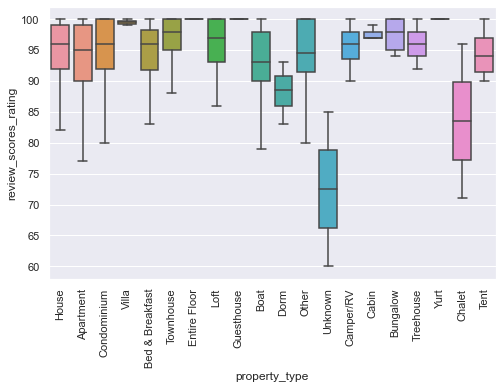

In [43]:
sns.set(rc={'figure.figsize':(8,5)})
listings_data['property_type'] = listings_data['property_type'].fillna('Unknown')
plot = sns.boxplot(x='property_type', y='review_scores_rating', data=listings_data, showfliers=False)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.figure.savefig("property_review.png")
plt.show()

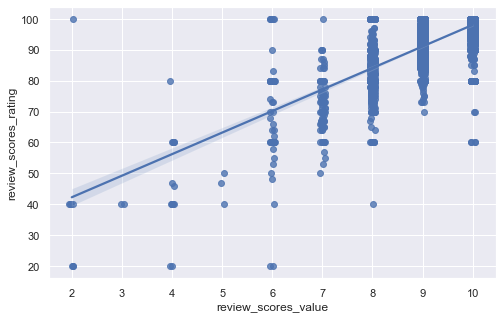

In [44]:
plot = sns.regplot(x='review_scores_value', y='review_scores_rating', data=listings_data, x_jitter=0.05)
plot.figure.savefig("value_review.png")

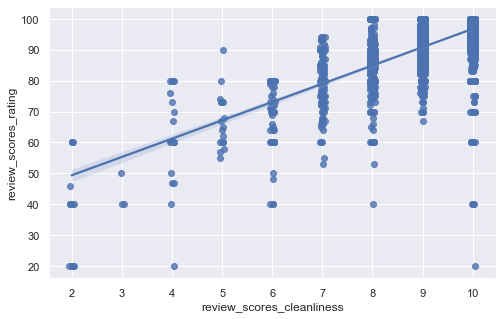

In [45]:
plot = sns.regplot(x='review_scores_cleanliness', y='review_scores_rating', data=listings_data, x_jitter=0.05)
plot.figure.savefig("cleanliness_review.png")

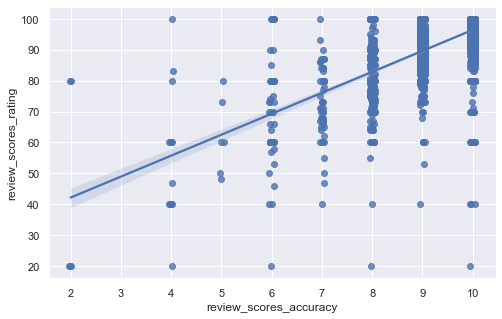

In [46]:
plot = sns.regplot(x='review_scores_accuracy', y='review_scores_rating', data=listings_data, x_jitter=0.05)
plot.figure.savefig("vaccuracy_review.png")

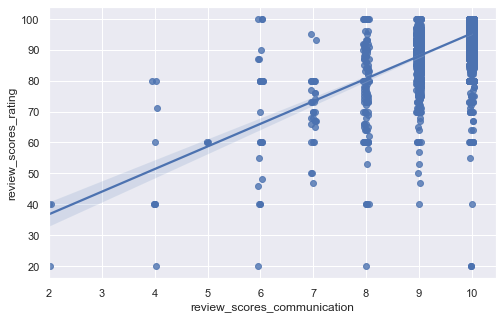

In [47]:
plot = sns.regplot(x='review_scores_communication', y='review_scores_rating', data=listings_data, x_jitter=0.05)
plot.figure.savefig("communication_review.png")

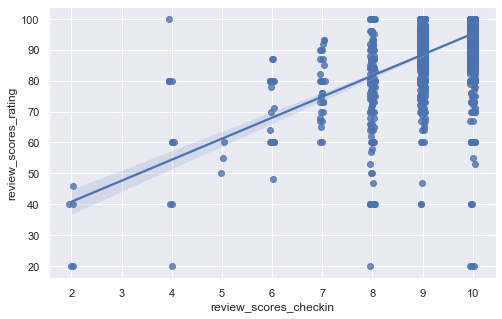

In [48]:
plot = sns.regplot(x='review_scores_checkin', y='review_scores_rating', data=listings_data, x_jitter=0.05)
plot.figure.savefig("checkin_review.png")

These regplots don't look that different from one another.  Perhaps fewer outliers on the right side with `value`,
but nonetheless there doesn't seem to be a huge difference among _which_ review component gets you more headway
in improving the overall rating.

### Question 2. What are the most important predictors of a more expensive listing?

In [49]:
print("Train score: {}", price_train_score)
print("Test score: {}", price_test_score)
for i in range(10):
    print(price_sorted_features[i])

Train score: {} 0.567013604131031
Test score: {} 0.5719825988818827
property_type_Dorm: -70.86999722472969
property_type_Boat: 47.28130182878106
property_type_Guesthouse: 45.83423272519229
cancellation_policy_super_strict_30: 43.53832803210235
room_type_Shared room: -31.328581621312715
room_type_Private room: -30.164206168640607
property_type_Villa: 28.57628402793692
property_type_Entire Floor: -22.098099163262365
property_type_Treehouse: -20.099639774773866
host_acceptance_rate: -19.42769193294318


Most of the top 10 weights here come from the `property_type` categorical variables.  So lets boxplot those, hiding
 the outliers to make the "main values" look more readable.  Dorms and Tents are the least expensive, boats and
 guesthouses are the most expensive.  Villas are also fairly expensive.

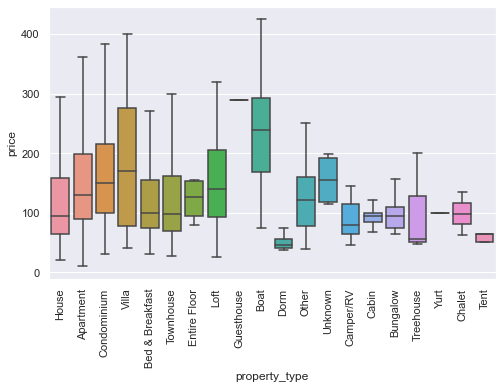

In [50]:
sns.set(rc={'figure.figsize':(8,5)})
plot = sns.boxplot(x='property_type', y='price', data=listings_data, showfliers=False)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.figure.savefig("price.png")
plt.show()

Again, the test score was middling but not outright terrible, at around .57.

By far the cheapest proeprties were dorms, while boats and guesthouses were indicators of more expensive properties.
So were super strict cancellation policies, apparently.  Also, the higher the acceptance rate, the lower the price
tended to be (interesting).

### Question 3: What are the most expensive times of the year to rent on AirBnb? Does this differ based on whether the listing is in Seattle or Boston?

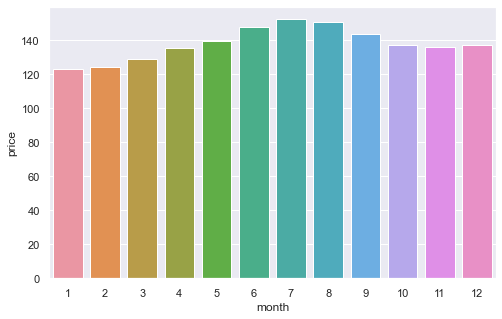

In [51]:
seattle_calendar_data = calendar_data[calendar_data['market'] == 'Seattle']
boston_calendar_data = calendar_data[calendar_data['market'] == 'Boston']

seattle_by_month = seattle_calendar_data.groupby(by=['month'], as_index=False).mean()
# boston_by_month.plot.bar(xlabel='Month', ylabel='Average price')
plot = sns.barplot(x='month', y='price', data=seattle_by_month)
plot.figure.savefig('seattle.png')
plt.show()

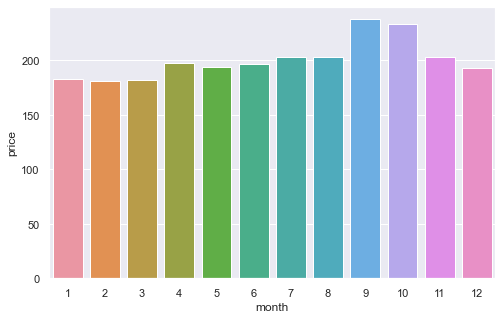

In [52]:
boston_by_month = boston_calendar_data.groupby(by=['month'], as_index=False).mean()
# boston_by_month.plot.bar(xlabel='Month', ylabel='Average price')
plot = sns.barplot(x='month', y='price', data=boston_by_month)
plot.figure.savefig('boston.png')
plt.show()

From these barcharts, we can see that the mean prices for airbnb listings in Seattle is highest in July/August.
But in Boston the peak season is September/October.  In both marktes, January and February seem to be the cheapest.